## Default risk detection

Predicting the Probability of a Borrower's Default

## 1. A problem statement that elaborates the task (underlying business problem)

Default risk is the chance that Borrowers will be unable to make the required payments. In other words, credit default risk is the probability that if Borrowers lend money, there is a chance that they won’t be able to give the money back on time. Therefore, it is extremely important for banks to calculate the borrower's rating at the time of issuing a loan  

Today's banks are striving to digitalize their services for the following reasons:
1. Convenience for customers for increase  speed of service 
2. Optimization and automation of the decision-making process for new and existing borrowers 
3. Reduction of operating costs for maintaining a labor-intensive and daily growing decision-making process 
4. Credit risk minimization

With the bank's digitalization and an increasing in the availability of loans, the number of borrowers increases and, accordingly, the amount of digital data grows significantly. 

Such a growing digitalization trend requires new digital solutions to classify borrowers into "good/bad" or defalt/not default. 

Credit default risk prediction problem is nothing but a binary **classification problem**, therefore, machine learning methods are widespread and popular in banks in the process of predicting a borrower's default. 

For the machine learning process, this problem will be a matter of **classifying** the default/non-default target, based on a dataset, containing a set of characteristics and features for each borrower. After building model, it  will be able **to predict** for new borrowers whether they will be solvent and whether they will be able to repay the loan.

### Content 

To build a decision-making model for bank borrowers, a dataset containing the following fields was taken:

- client_id - client_id
- education - the level of education
-sex - пgender of the borrower
-age - borrower's age
-car - vehicle presence flag
-car_type - foreign car flag
-decline_app_cnt - number of rejected past applications
-good_work - good job flag
-bki_request_cnt - number of requests to the BCI (credit history bureau)
-home_address - home address categorizer
-work_address - business address categorizer
-income - borrower's income
-foreign_passport - the presence of a passport
-sna - communication between the borrower and the bank's customers
-first_time - the age of availability of information about the borrower
-score_bki - scoring score according to data from BCI (credit history bureau)
-region_rating - region ranking
-app_date - application date
-default - loan default flag

Dataset and content information taken from the site by Community Prediction Competition https://www.kaggle.com/c/sf-dst-scoring

### Import Python Libraries

First import the libraries to be able to call functions that needed for this prject. In this project the most useful libraries are:

- **pandas** library which offers data structures and operations for manipulating numerical tables and time series
- **sklearn** library which provides many unsupervised and supervised learning algorithms
- **imblearn** library that helps in balancing the datasets
- **matplotlib, plotly, seaborn** for data visualization 

In [33]:
import pandas as pd
import numpy as np

import sklearn.model_selection 
import sklearn.neighbors 
import sklearn.metrics
import sklearn.preprocessing

import imblearn.over_sampling

from scipy import stats

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## 2. Data Collection

#### Import data and short characteristics

Detailed descriptions of the datasets have been shown in this section 

In [2]:
df = pd.read_csv("bank.csv")
df.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0


Given that the table contains data on the date of application, it would be correct to add the "month" column based on this date in order to enlarge the data and trace the dependence of the default on seasonality or the month of the year

In [3]:
df['Month'] = pd.DatetimeIndex(df['app_date']).month

In [4]:
print ("The volume of table is: ", df.shape)
print ("The list of columns is: ", df.columns)

The volume of table is:  (73799, 20)
The list of columns is:  Index(['client_id', 'app_date', 'education', 'sex', 'age', 'car', 'car_type',
       'decline_app_cnt', 'good_work', 'score_bki', 'bki_request_cnt',
       'region_rating', 'home_address', 'work_address', 'income', 'sna',
       'first_time', 'foreign_passport', 'default', 'Month'],
      dtype='object')


The dataset contains the customers’ personal details, each of them characterized by 20 labeled variables. In total 73799 clients are provided in the dataset. 

#### Splitting the data into training and test sets

Before cleaning the data it is nessesary to split the data to test and train datasets, so that when training the model, data that has been removed or built artificially is not taken into account

In [5]:
df_train, df_test = sklearn.model_selection.train_test_split(df)
print("df_train:", df_train.shape)
print("df_test:", df_test.shape)

df_train: (55349, 20)
df_test: (18450, 20)


The data is separated and using the shape() method we can see the volume of new sets. Further, for data processing and further model building, we will use the training set. We will not use the original table, in order to the data in it should not be changed

## 3. Data Exploration

#### Dataset details

The info() method prints details about the dataset. This info contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (including non-null values).

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In information above clearly seen that in column "education" the number of Non-Null vales different from other data. More detailed work with this shortcoming is described and carried out in the following parts of project.

Considering than dataset contains some "object" types of data, **this dataset require encoding techniques** for futher building model

Function .describe() is used to view some general statistical information (percentile, mean, max, min, std, etc.). Here included only finantial information and information, which can give some statistic picture (age, income, score_bki)

In [7]:
df[['age', 'income', 'score_bki']].describe()

,age,income,score_bki
count,73799.000000,73799.000000,73799.000000
mean,39.280641,41099.775417,-1.904724
std,11.520378,46166.322400,0.498231
min,21.000000,1000.000000,-3.624586
25%,30.000000,20000.000000,-2.259534
50%,37.000000,30000.000000,-1.920823
75%,48.000000,48000.000000,-1.569831
max,72.000000,1000000.000000,0.199773


In the resulting statistics, need to pay attention to next insights:

1. Information about borrowers' age:
- minimum age is 21 
- maximum age is 72 
- mean age is 39

2. Information about borrowers' income:
- minimum income is 1000 
- maximum income is 1000000 
- mean income is 41085

3. Information about borrowers' score_bki:
- minimum income is -3.62 
- maximum income is 0.19
- mean income is -1.9


To view the number of unique elements in each column, the function nunique() is applied. 

In [8]:
df.nunique()

client_id           73799
app_date              120
education               5
sex                     2
age                    52
car                     2
car_type                2
decline_app_cnt        21
good_work               2
score_bki           69096
bki_request_cnt        38
region_rating           7
home_address            3
work_address            3
income                966
sna                     4
first_time              4
foreign_passport        2
default                 2
Month                   4
dtype: int64

It seems that in the dataset, the columns with the address do not indicate the real address of the borrowers, but a classifier is applied

#### Correlation analysis

For a general understanding and further analysis, it is necessary to check the correlation (relationship) between the available features and the target feature in the dataset

Before getting a correlation we need make some steps:

1. Create new dataframe (df_corr) only for the purposes of calculating the correlation
2. Exlude columns, which for sure not correlated whith default flag ("client_id","app_date") for making program work faster
3. Convert categorical features to numerical ones. In order not to interfere with the main table with data that will be converted into digital values, we will form a separate table (df_corr) only for the purposes of calculating the correlation. If we simply replace the original table with the converted ones, then when building the model, such numerical values can be perceived by the system as ordered, which will lead to errors

In [9]:
df_corr = df.drop(["client_id","app_date"], axis=1)

df_corr['education'] = df_corr['education'].astype('category').cat.codes
df_corr['sex'] = df_corr['sex'].astype('category').cat.codes
df_corr['car'] = df_corr['car'].astype('category').cat.codes
df_corr['car_type'] = df_corr['car_type'].astype('category').cat.codes
df_corr['foreign_passport'] = df_corr['foreign_passport'].astype('category').cat.codes

Then we find the correlation of the target variable "default" with all columns and sort in descending order for clarity

In [10]:
df_corr[df_corr.columns[:]].corr()['default'][:].sort_values(ascending=False)

default             1.000000
score_bki           0.175369
sna                 0.125832
decline_app_cnt     0.113682
home_address        0.084637
work_address        0.081582
bki_request_cnt     0.078242
education           0.070693
sex                 0.019619
age                -0.025004
Month              -0.037115
income             -0.039752
car                -0.043161
good_work          -0.043361
car_type           -0.057484
foreign_passport   -0.066718
region_rating      -0.089035
first_time         -0.105579
Name: default, dtype: float64

Correlation method showed the following relationships between the target variable "default" and other (top-3 in descending order):
1. **score_bki**(scoring score according to data from BCI (credit history bureau))
2. **sna** (communication between the borrower and the bank's customers)
3. **decline_app_cnt** - number of rejected past applications

At the same time, it should be noted that the signs that have the everse connection with the "default" feature (top-3 in descending order):
1. **first_time** (the age of availability of information about the borrower)
2. **region_rating** (region ranking)
3. **foreign_passport** (the presence of a passport) 

The revealed connections are quite logical and natural

#### Visualizing data points and features

For a clear presentation of data and their better understanding, we need to draw up a graph showing the dependencies of the main financial indicators that seem the most logical and are associated with the highest correlation with default. At the same time, in order to see the categories of clients with default and without default, we need to visually divide them into classes:
- default (default = 1)
- not default (default = 0)

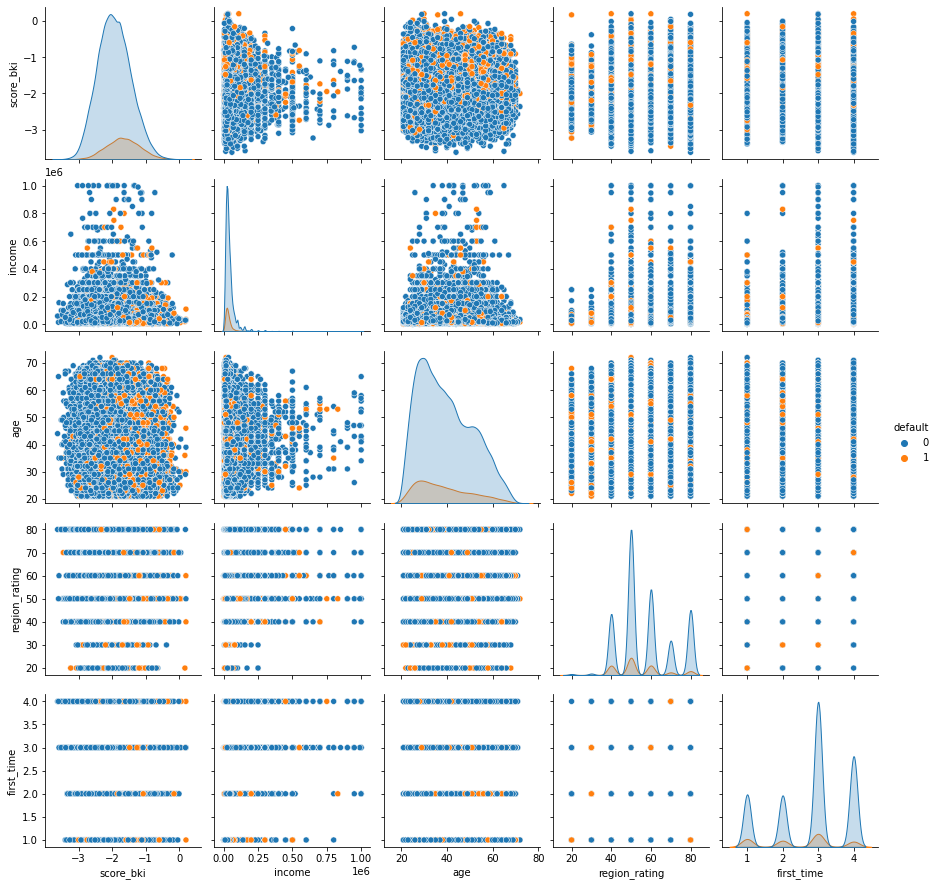

In [11]:
col_for_vizual = ['score_bki', 'education', 'income', 'age', 'default', 'region_rating', 'first_time']
sns.pairplot(df[col_for_vizual], hue="default")

The most ordered data looks on three axes "score_bki", "region_rating", "income". Let's look to them in 3-D space for finding any relationships with default flag. Borrowers marked in yellow those who has default=1

/tmp/ipykernel_30526/2224081621.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(15,8)).gca(projection='3d')


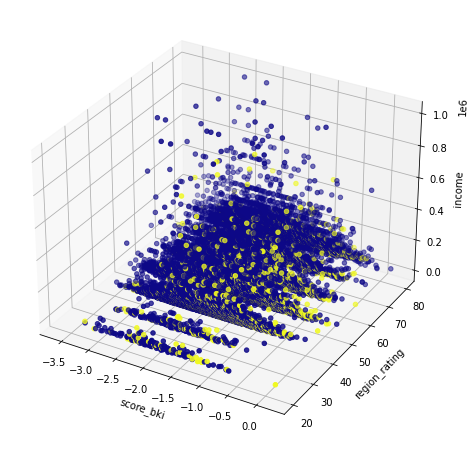

In [12]:
ax = plt.figure(figsize=(15,8)).gca(projection='3d')
ax.scatter(
    xs=df["score_bki"], 
    ys=df['region_rating'],
    zs=df["income"], 
    c=df["default"], 
    cmap='plasma'
)
ax.set_xlabel('score_bki')
ax.set_ylabel('region_rating')
ax.set_zlabel('income')
plt.show()

The chart above clearly shows following insigths:
- the higher the score_bki, the greater the probability of default
- the lower the income, the greater the probability of default
- the lower the region_rating, the greater the probability of default

This kind of information could be extremly useful for banks when banks will set product conditions and prohibitions for certain categories of customers or setting limits for such categories. 

For instance, approximately the worst customers for banks who is most vulnerable to default are:
- that who lives in region with rating from 20 to 30
- that who has score rating in bki higher than -1.5
- that who has income level less than 60% from all dataset

Also an important insight is that in the original dataset there are no pure customer segments that would definitely be with and without the default flag. Clients of different categories may or may not be subject to default, but some to a greater extent, and some to a lesser extent.

#### Identifying data quality issues

##### Find a missing values

First of all it is nessesary to indicate number of null data

In [13]:
df.isnull().sum()

client_id             0
app_date              0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
default               0
Month                 0
dtype: int64

It is obvious that there are missing values in the "education" column, in the future, **when cleaning the data, we will need to remove** them

##### Find dublicates

Check dataset to find any dublicates. Here is no dublcates

In [14]:
df.duplicated().sum()

0

##### Find implicit data in every column

Implicit data search is performed below. while not revealing any implicit invalid data that could affect the analysis

In [15]:
for col in df:
  print(df[col].unique())

[ 25905  63161  25887 ... 103695    861  15796]
['01FEB2014' '12MAR2014' '23JAN2014' '18APR2014' '18FEB2014' '04FEB2014'
 '17MAR2014' '14FEB2014' '10JAN2014' '03FEB2014' '08APR2014' '08JAN2014'
 '19MAR2014' '22JAN2014' '30JAN2014' '11MAR2014' '02FEB2014' '14APR2014'
 '06JAN2014' '24MAR2014' '15APR2014' '28FEB2014' '11FEB2014' '30MAR2014'
 '23MAR2014' '09MAR2014' '02MAR2014' '31JAN2014' '14MAR2014' '26JAN2014'
 '03APR2014' '22MAR2014' '11JAN2014' '17FEB2014' '13FEB2014' '17APR2014'
 '25FEB2014' '10APR2014' '01APR2014' '21APR2014' '20MAR2014' '03MAR2014'
 '25MAR2014' '24FEB2014' '16APR2014' '27FEB2014' '18MAR2014' '19FEB2014'
 '20FEB2014' '31MAR2014' '04MAR2014' '25JAN2014' '07JAN2014' '07MAR2014'
 '26MAR2014' '05FEB2014' '06MAR2014' '08FEB2014' '21JAN2014' '13MAR2014'
 '09JAN2014' '07FEB2014' '29JAN2014' '27JAN2014' '15FEB2014' '29APR2014'
 '04APR2014' '16JAN2014' '07APR2014' '13JAN2014' '21MAR2014' '24JAN2014'
 '27MAR2014' '09FEB2014' '06FEB2014' '22FEB2014' '28JAN2014' '28APR2014'
 '1

When visually inspecting the unique elements in the table, no implicit error data was found. No additional cleaning required



##### Data balance check

To further build the model, we need to check how uniform the ratio of data on the target variable "default". For such a check, we will first group the data by the presence or absence of a default, then, for clarity, we will build a pie chart, where the data ratio will be clearly seen

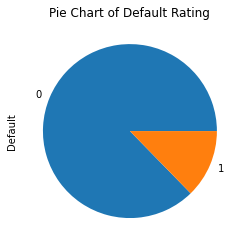

In [16]:
df1 = df.groupby('default').size()

df1.plot(kind='pie', figsize=(4, 4))
plt.title("Pie Chart of Default Rating")
plt.ylabel("Default")
plt.show()

The pie chart shows that the number of clients with default ('default' = 1) in the analyzed dataset is much less than without default ('default' = 0). When building a model, it is necessary to take into account such an imbalance of data. **This dataset require balancing techniques**

### 4. Data Preprocessing

Data preprocessing is the process of cleaning and preparing the raw data to enable feature engineering. It has traditionally been an important preliminary step for the data mining process.

##### Removing missing values

The need to remove null indicators was previously identified, so we will all rows, which contain null elements,   using the **dropna()** method

In [17]:
df_train_cleaned = df_train.dropna()
print("df_train_cleaned:", df_train_cleaned.shape)

df_test_cleaned = df_test.dropna()
print("df_test_cleaned:", df_test_cleaned.shape)

df_train_cleaned: (55118, 20)
df_test_cleaned: (18374, 20)


Observations of the volume of the new cleared table showed that its size has changed, which means that removing missing values completed

#### Handling outliers

To further build the model, we need to find and delete outliers

source: https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe

In [18]:
def drop_numerical_outliers(df, z_thresh=3):
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)
    
drop_numerical_outliers(df_train_cleaned)
print ("df_train_cleaned: ", df_train_cleaned.shape)

drop_numerical_outliers(df_test_cleaned)
print ("df_test_cleaned: ", df_test_cleaned.shape)

df_train_cleaned:  (52105, 20)
df_test_cleaned:  (17370, 20)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


After performing the operations above, we excluded the outliers and now the data is cleared and the model will be more accurate

### 5. Feature Engineering

Feature engineering step to prepare the dataset for learning

#### Splitting Features and the Target Label

To further build the model, we need to split the data into a test and a train. In this case, the target variable is "default", and the total set is all data except the target and columns, which, logically, will definitely not affect the relationship to the target variable ("client_id","app_date")

In [19]:
x_train = df_train_cleaned.drop(["default","client_id","app_date"], axis=1)
y_train = df_train_cleaned["default"]
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)

x_test = df_test_cleaned.drop(["default","client_id","app_date"], axis=1)
y_test = df_test_cleaned["default"]
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (52105, 17)
y_train: (52105,)
x_test: (17370, 17)
y_test: (17370,)


#### One-Hot Encoding

Considering that most learning algorithms only work with numerical feature vectors, but some features in dataset is categorical, we need to first **transform them into numerical features**. Let's transform such a non-ordinal categorical features into several binary features using One-Hot Encoding technique. 

In order not to increase extra columns and not slow down the program, limit the number of columns that will be transformed using the technique "One-Hot Encoding". Transform only columns whose data type is *object* ('sex', 'foreign_passport', 'education', 'car', 'car_type', etc.) and then concat its transformed array massive with original part of dataset, which columns contain only numerical elements. 


In [20]:
# step 1. Building the one-hot encoder model 
enc = sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore", sparse=False, categories='auto')

# step 2. Encoding only for categorical elements (type = object) of training and test data
x_train_encoded = enc.fit_transform(x_train.select_dtypes(include=[object]))
x_test_encoded = enc.fit_transform(x_test.select_dtypes(include=[object]))

# step 3. Create arrays from dataset which include only numerical elements
x_train_numerical = x_train.select_dtypes(include=['int64','float64']).to_numpy()
x_test_numerical = x_test.select_dtypes(include=['int64','float64']).to_numpy()

# step 4. Join two array (encoded categorial + numerical)
x_train_encoded_merged = np.concatenate((x_train_numerical, x_train_encoded), axis=1)
x_test_encoded_merged = np.concatenate((x_test_numerical, x_test_encoded), axis=1)

print("x_train_encoded_merged: ", x_train_encoded_merged.shape)
print("x_test_encoded_merged: ", x_test_encoded_merged.shape)

x_train_encoded_merged:  (52105, 25)
x_test_encoded_merged:  (17370, 25)


After the transformation, it is clear that the number of columns has increased, which is logical. The new increased number of columns is quite acceptable and therefore no dimention reduction technique is needed

#### Standardization

Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

In [21]:
# Building a standardization model
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(x_train_encoded_merged)

# Scaling the training features
x_train_standardized = scaler.transform(x_train_encoded_merged)

# Reducing the number of test features
x_test_standardized = scaler.transform(x_test_encoded_merged)

print("x_train_standardized:", x_train_standardized.shape)
print("x_test_standardized:", x_test_standardized.shape)

x_train_standardized: (52105, 25)
x_test_standardized: (17370, 25)


Standardization process is comlited, in final model assesment step it is obvious that this process was needed and increase final accuracy

#### Oversampling

As mentioned before dataset is imbalanced. To avoid distortion of accuracy towards the majority class there is imbalanced technique is needed. 

In [22]:
sm = imblearn.over_sampling.SMOTE() 
x_train_balanced, y_train_balanced = sm.fit_resample(x_train_standardized, y_train)
y_train_balanced.value_counts()

0    45686
1    45686
Name: default, dtype: int64

After the transformation of the data, it is clear that now there is no dominant class and both classes are equal in size to each other

### 6. Training a Model

### Algorithm selection and Hyperparameter tuning using grid search with cross-validation

To select the best model and to avoid overfitting and underfitting, let's build three models with different hyperparameters:
1. Decision Tree
2. Logistic Regression
3. K-nearest neighbors (KNN) 

These models were chosen because they are valid for solving the classification problem. It is just required to complete our business task. 
To speed up and optimize the selection of the best model, we use Grid Search. Grid Search is the most simple hyperparameter tuning technique

#### Decision Tree

Introduction Decision Trees are a type of Supervised Machine Learning (that is explain what the input is and what the corresponding output is in the training data) where the data is continuously split according to a certain parameter. The tree can be explained by two entities, namely decision nodes and leaves. Decision Tree covering both classification and regression.
 

In [23]:
parameters_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": range (1,20,1),
    "min_samples_split": range(2,20,1),
}
model_1 = sklearn.model_selection.GridSearchCV(sklearn.tree.DecisionTreeClassifier(),
                                              parameters_grid, scoring="accuracy", cv=15, n_jobs=-1)
model_1.fit(x_train_balanced, y_train_balanced)
print ("Accuracy of best decision tree classifier = {:.2f}".format(model_1.best_score_))
print ("Best found hyperparameters of decision tree classifier = {}".format(model_1.best_params_))

Accuracy of best decision tree classifier = 0.86
Best found hyperparameters of decision tree classifier = {'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 9}


Gritsearch determined the most appropriate hyperparameters for the Decision Tree model as indicated above. The accuracy is 0.86 which is the best result after fitting various hyperparameters.

#### Logistic Regression

Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set. A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.

In [24]:
parameters_grid = {
    'C'       : [100, 10, 1.0, 0.1, 0.01, 0.001], 
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
    'l1_ratio': [0.25, 0.5, 0.75],
}
model_2 = sklearn.model_selection.GridSearchCV(sklearn.linear_model.LogisticRegression(),
                                              parameters_grid, scoring="accuracy", cv=5, n_jobs=-1)
model_2.fit(x_train_balanced, y_train_balanced)
print ("Accuracy of best Logistic Regression classifier = {:.2f}".format(model_2.best_score_))
print ("Best found hyperparameters of Logistic Regression classifier = {}".format(model_2.best_params_))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "


Accuracy of best Logistic Regression classifier = 0.67
Best found hyperparameters of Logistic Regression classifier = {'C': 1.0, 'l1_ratio': 0.25, 'solver': 'liblinear'}


#### KNN

The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems. The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.

In [25]:
parameters_grid = {
    "n_neighbors": [1, 2, 3, 5],
    "metric"     : ["minkowski", "euclean", "manhattan"]
}
model_3 = sklearn.model_selection.GridSearchCV(sklearn.neighbors.KNeighborsClassifier(),
                                              parameters_grid, scoring="accuracy", cv=10, n_jobs=-1)
model_3.fit(x_train_balanced, y_train_balanced)
print ("Accuracy of best KNN classifier = {:.2f}".format(model_3.best_score_))
print ("Best found hyperparameters of KNN classifier = {}".format(model_3.best_params_))

Accuracy of best KNN classifier = 0.93
Best found hyperparameters of KNN classifier = {'metric': 'manhattan', 'n_neighbors': 2}


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.89873259 0.9087795  0.85788865 0.83258549        nan        nan
        nan        nan 0.92127775 0.92624661 0.89013045 0.86935825]
  warnings.warn(


The KNN showed the best accuracy and this is make sense. But given that the prediction of the definition of bank default is a rather complex and responsible process, errors in which can cause monetary damage to the bank, it is necessary to consider in more detail the process of evaluating more than one model. Therefore, consider two models with the highest accuracy KNN and Decision Tree.

### Testing the best model and Model's assessment

After building three models, it can be seen that the best result was shown by model # 1 and # 3 (Decision Tree and KNN). Therefore, all further actions will be carried out only with it two model for finding the final model for predicting the target variable (default / not default).

To summarizes how successful the classification model is at predicting examples belonging to various classes we need mesure the evaluation metrics for classification:
- Accuracy
- Precision, recall, and F-score
- Confusion matrix


Decision Tree Metrics:

In [26]:
y_predicted = model_1.predict(x_test_standardized)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
cm = sklearn.metrics.confusion_matrix(y_test, y_predicted)
precision, recall, f1, support = sklearn.metrics.precision_recall_fscore_support(y_test, y_predicted)

print ("Accuracy:   ", accuracy)
print ("Precision:  ", precision)
print ("Recall:     ", recall)
print ("F1-Score:   ", f1)
print ("Confusion matrix: \n", cm)

Accuracy:    0.8053540587219343
Precision:   [0.89220455 0.19248609]
Recall:      [0.8863206  0.20194647]
F1-Score:    [0.88925284 0.19710283]
Confusion matrix: 
 [[13574  1741]
 [ 1640   415]]


KNN metrics:

In [27]:
y_predicted_3 = model_3.predict(x_test_standardized)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted_3)
cm = sklearn.metrics.confusion_matrix(y_test, y_predicted_3)
precision, recall, f1, support = sklearn.metrics.precision_recall_fscore_support(y_test, y_predicted_3)

print ("Accuracy:   ", accuracy)
print ("Precision:  ", precision)
print ("Recall:     ", recall)
print ("F1-Score:   ", f1)
print ("Confusion matrix: \n", cm)

Accuracy:    0.807656879677605
Precision:   [0.89023595 0.18293886]
Recall:      [0.89180542 0.18053528]
F1-Score:    [0.89102    0.18172912]
Confusion matrix: 
 [[13658  1657]
 [ 1684   371]]


Information about what the metrics show:

**Accuracy**:
Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition: Accuracy = Number of correct predictions Total number of predictions 

So, for Decision Tree Accuracy of best model is 86% for training and 80.5% for test set. 

For KNN model Accuracy is 93% for training and 80.7% for test set. Such difference between indicators says about overfitting model. 

**Precision**:
Precision is one indicator of a machine learning model's performance – the quality of a positive prediction made by the model. Precision refers to the number of true positives divided by the total number of positive predictions (i.e., the number of true positives plus the number of false positives).

For our specific business question, **Precision is the most important metric**. Because in the classification problem with default detection, high precision is needed (we need to eliminate the erroneous classification of the allowable volume of defaulted borrowers as much as possible). And in this case, assumptions are possible to determine good borrowers as default ones. This approach will minimize banking risks. 

So, for Decision Tree Precision is 89.2%.

For KNN model Precision is 89.0%.

Considering that the Precision of Decision Tree is higher than KNN, **Decision Tree will be chosen as the best default flag prediction model within the given business project**

**Recall**
Recall tells us what proportion of actual positives was identified correctly. 

So, for Decision Tree Recall is 88.6%.

For KNN model Recall is 89.1%.

Such a metric is not the most important for bank scoring. The model may be not 100% accurate, but the mistakes made in this case will not cause damage to the bank (that is, good borrowers will be identified as default). Such errors may reduce credit sales but not cause financial damage. Thus, this indicator is less important for us than the Precision. Therefore, when deciding on the choice of the best model, this indicator plays the least important role.

**F1** Score is the weighted average of Precision and Recall. We have the same F1 score on both models, which is equal 88%. 

**Confusion Matrix**
Confusion Matrix shows summary of prediction results on a classification problem. In this case, the matrix confirms all the assumptions described above. 

## Conclusion

In the context of this project, the main issue was considered - Predicting the Probability of a Borrower's Default (Default risk detection).

To build the most correct model for predicting the default of new bank borrowers, the following was carried out:
- the existing dataset of the bank was collected for a certain volume of borrowers, which were already divided into two categories (default / not default).Tthe data was collected historically on actual real borrowers who previously applied to the bank, took out a loan with a real result of default or repayment of the loan,
- the volume of the dataset is divided into test and training sets for further model training and testing,
- work was done on data preprocessing, where data was cleaned by zero values and outliers.
- work was carried out on feature engineering, where the tasks of transforming the test and training set from categorical values into numerical ones were solved for the further possibility of building a model, standardization and balancing of data was carried out
- the best model for predicting default was trained and tested, as a result, metrics for evaluating the model were derived and analyzed, and the most optimal model was selected

It is important to note that a bank scoring model built on a real dataset will not predict 100% accuracy or close to it. This problem was described above in the data visualization step, where it was shown that there are no clear and specific customer segments that would be clearly divided into default and non-default ones. There are many borrowers who, with the performance of one segment, fall within the boundaries of another. Therefore, the model does not show such high accuracy. However, in the process of analysis, the best model was chosen, which combines both the minimization of bank risks and the maximum predictive ability.

## Data-driven recomdation

As a result of the analysis and work performed, recommendations are given for the bank based on the data provided:

1. Implement the developed model in banking automated systems and, when new borrowers apply, implement a decision-making system on it. Any decisions of the bank (issuing a loan, opening a deposit, securities, etc.) should be based on a prediction of the client's status - default/non-default. Taking this into account, it will be more profitable and easier for the bank to segment customers.
2. Considering that the model is not a 100% prediction of the customer segment, set limits for customers to withdraw money for the least loss in case of an incorrect prediction.
3. To improve the performance of the model, you need to supplement the dataset with other details about the client, including from government databases, so that the segmentation is more accurate. Such data can be, for example, the presence of pension contributions, the presence of tax debts, the presence of unpaid fines, and so on.
4. On new data, the model must be tested and paid careful attention to the first customers

## References 

Community Prediction Competition. https://www.kaggle.com/c/sf-dst-scoring

Stack Overflow. Detect and exlude outliers in a Pandas Dataframe.  https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe